In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
path = r"E:\GLO_林口長庚資料集\Process_2022\UNSUPER\archive\flower_images\flower_images"

# change the working directory to the path where the images are located
os.chdir(path)
p = r"E:\GLO_林口長庚資料集\Process_2022\UNSUPER\archive\models\flower_features.pkl"

# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('flower_labels.csv')

In [3]:


# this list holds all the image filename
flowers = []
data = {}
groups = {}
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [4]:

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
        

# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

label = df['label'].tolist()
unique_labels = list(set(label))

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)
# cluster feature vectors
length = len(unique_labels)
length = 50
kmeans = KMeans(n_clusters=length, random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


1/1 [==============================] - 0s 137ms/step


c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:


# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

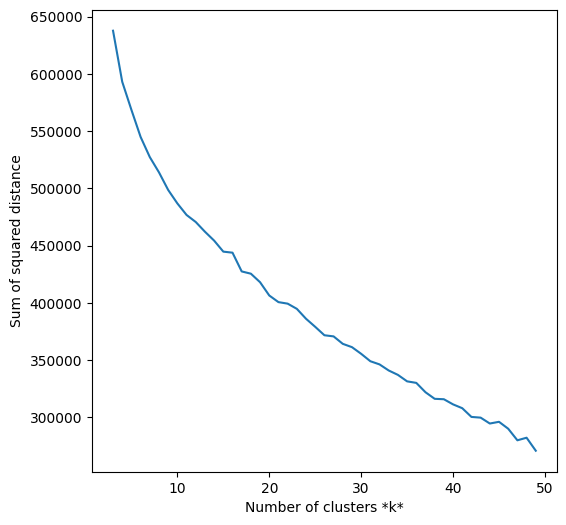

In [6]:
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [7]:
print(flowers[:10])

['0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png', '0010.png']


In [8]:
print(len(groups))

50


c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24218 (\N{CJK UNIFIED IDEOGRAPH-5E9A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\VLSI\anaconda3\envs\Tf-ix\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing f

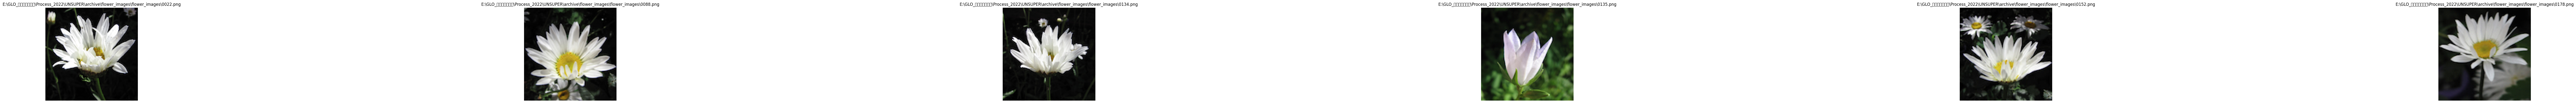

In [9]:
# from PIL import Image
# from IPython.display import display, HTML
# for ii in range(len(groups[0])):
#     img = Image.open(f"{path}\{groups[0][ii]}")
#     display(img)

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
group_ii = 30
fig, axes = plt.subplots(1, len(groups[group_ii]), figsize=(150, 5))  # Adjust figsize as needed

for i, img_info in enumerate(groups[group_ii]):
    img = mpimg.imread(f"{path}\{groups[group_ii][i]}")
    axes[i].imshow(img)
    axes[i].set_title(f"{path}\{groups[group_ii][i]}")
    axes[i].axis('off')

plt.show()

In [22]:
print(len(groups))

50
